## Importing the necessary Libraries:

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Data Preprocessing and Scaling:

In [17]:
df = pd.read_csv('Mall_Customers.csv')
print("Basic Dataset Structure:")
print(df.head(),'\n')

print("Missing values check:")
print(df.isnull().sum(), '\n')

gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

features = ['Gender', 'Age', 'Spending Score (1-100)', 'Annual Income (k$)']
scale = StandardScaler()
df_scaled = scale.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)

Basic Dataset Structure:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40 

Missing values check:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64 



## Applying the K-means Algorithm:

In [18]:
sumOfSq = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    sumOfSq.append(kmeans.inertia_)

## Plotting and Graphical representation:

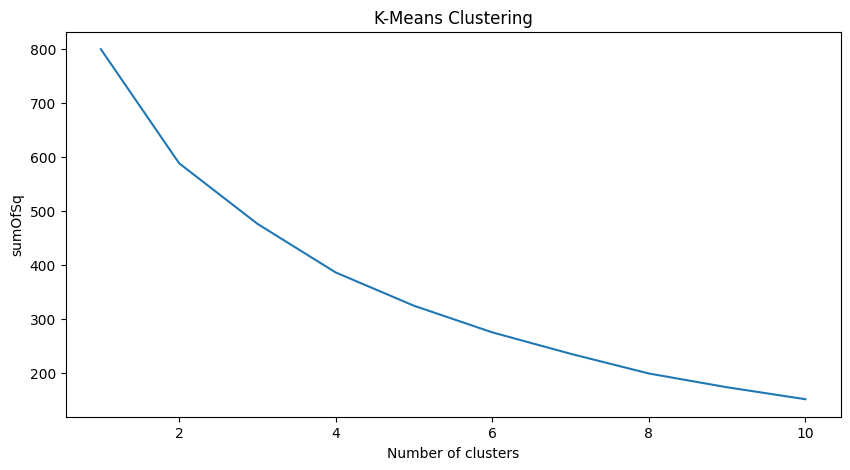


Age/Spending Score


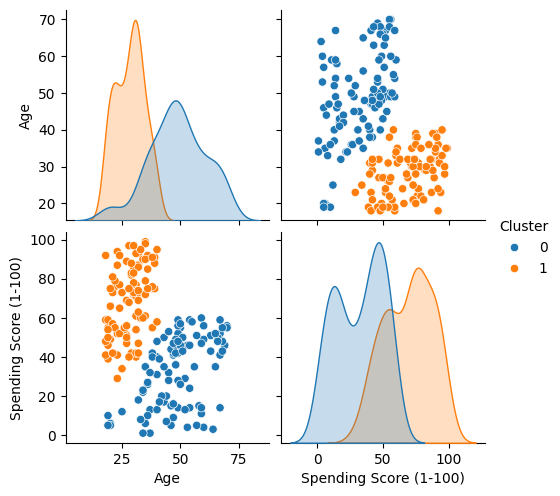


Age/Annual Income


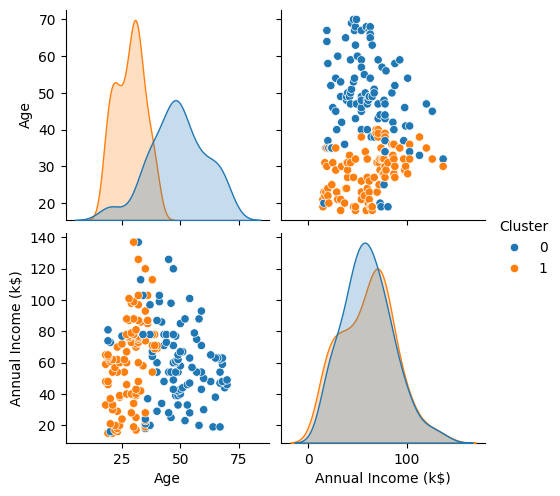


Spending Score/Annual Income


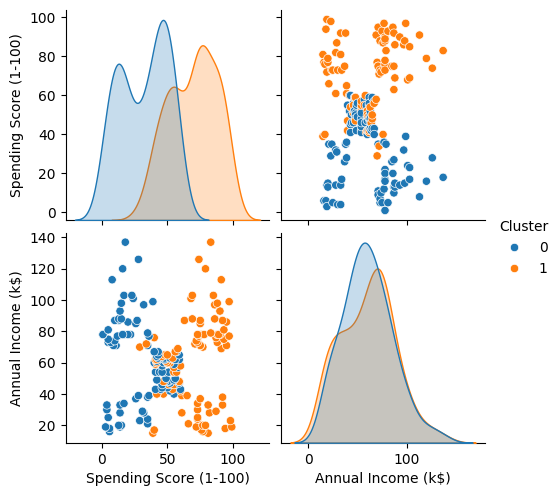

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), sumOfSq)
plt.title('K-Means Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('sumOfSq')
plt.show()
print()

optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

print("Age/Spending Score")
sns.pairplot(df, hue='Cluster', vars=['Age','Spending Score (1-100)'], palette='tab10')
plt.show()
print()

print("Age/Annual Income")
sns.pairplot(df, hue='Cluster', vars=['Age','Annual Income (k$)'], palette='tab10')
plt.show()
print()

print("Spending Score/Annual Income")
sns.pairplot(df, hue='Cluster', vars=['Spending Score (1-100)','Annual Income (k$)'], palette='tab10')
plt.show()
print()

- We are successfully able to see the formation of two discrete clusters using Age and Spending scores as our parameters. While Annual Income is an important parameter, we compare all these three parameters with each other and choose the most optimal process for our analysis.